<a href="https://colab.research.google.com/github/genkihoshino02/titanic_datascience/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#import these libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

In [ ]:
dir_path = '/content/drive/MyDrive/Programming/DataScience_Titanic/'

#learn data
train_df=pd.read_csv(dir_path+"train.csv")
#test data
test_df=pd.read_csv(dir_path+"test.csv")


In [ ]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
print("Size of train data:" , train_df.shape)
print("Size of test data:" , test_df.shape)

Size of train data: (891, 12)
Size of test data: (418, 11)


In [ ]:
#Merge two datas
df=pd.concat([train_df,test_df],ignore_index=True)
df.shape

(1309, 12)

In [ ]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [ ]:
df.groupby('Sex').agg({'Sex':'count'})

,Sex
Sex,
female,466
male,843


In [ ]:
tmp=df.groupby('Sex').agg({'Sex':'count'}).rename(columns={'Sex':'count_sex'})
tmp

,count_sex
Sex,
female,466
male,843


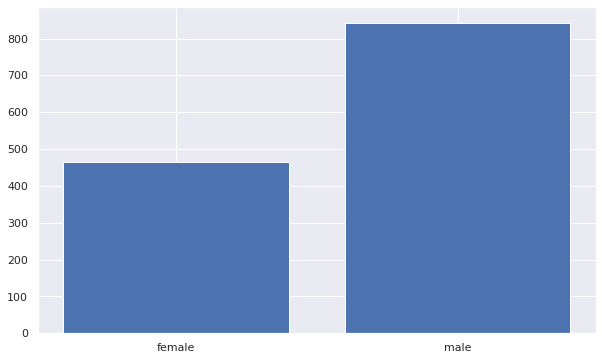

In [ ]:
plt.figure(figsize=(10,6))

plt.bar(tmp.index,tmp.count_sex)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


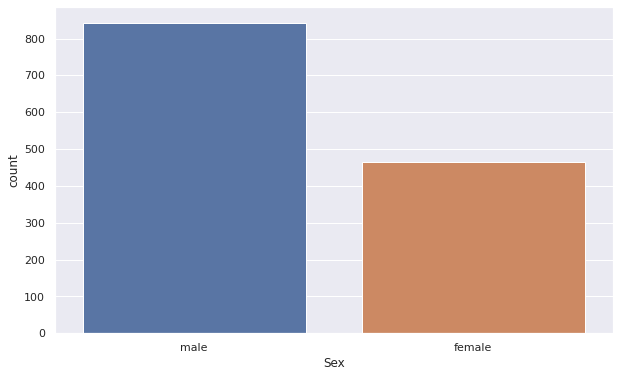

In [ ]:
#display with seaborn
plt.figure(figsize=(10,6))

sns.countplot('Sex',data=df)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


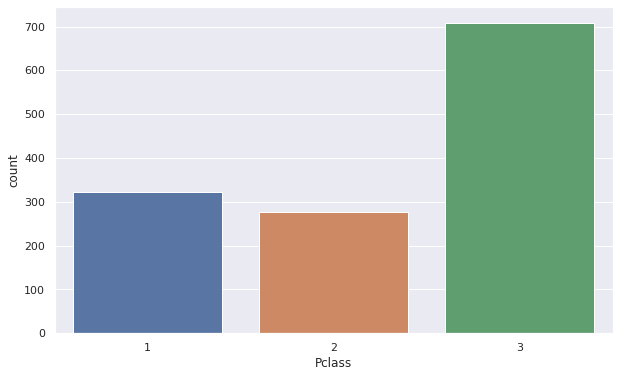

In [ ]:
plt.figure(figsize=(10,6))

sns.countplot('Pclass',data=df)
plt.show()

In [ ]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [ ]:
print("loss of Embarked data:", df.Embarked.isnull().sum() )

loss of Embarked data: 2


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


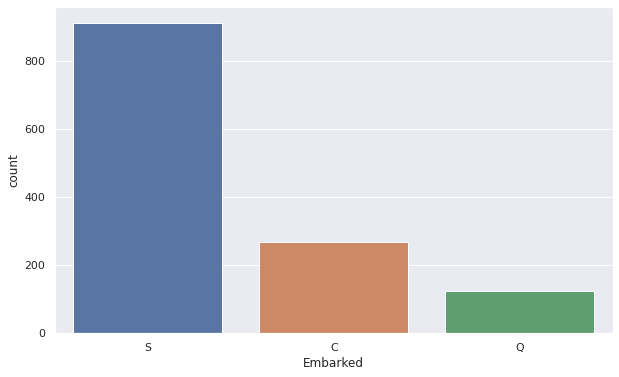

In [ ]:
plt.figure(figsize=(10,6))

sns.countplot('Embarked',data=df)
plt.show()

In [ ]:
df2=df.copy()

df2.Embarked=df2.Embarked.fillna("S")

print("loss of Embarked:" , df2.Embarked.isnull().sum())

loss of Embarked: 0


In [ ]:
print("max:",df.Age.max())
print("min:",df.Age.min())

max: 80.0
min: 0.17


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


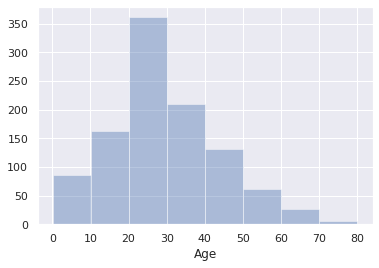

In [ ]:
sns.distplot(df.Age,kde=False,bins=8)
plt.show()
pass

In [ ]:
print('mean:',df.Age.mean())
print('mddian:',df.Age.median())

mean: 29.881137667304014
mddian: 28.0


In [ ]:
df3=df2.copy()

age_median=df3.Age.median()
age_median

28.0

In [ ]:
df3.Age=df3.Age.fillna(age_median)
print('loss of Age:',df3.Age.isnull().sum())

loss of Age: 0


In [ ]:
df4=df3.drop(columns=['Cabin','Fare','Ticket','SibSp','Parch','Name'])
df4.head()

,PassengerId,Survived,Pclass,Sex,Age,Embarked
0,1,0.0,3,male,22.0,S
1,2,1.0,1,female,38.0,C
2,3,1.0,3,female,26.0,S
3,4,1.0,1,female,35.0,S
4,5,0.0,3,male,35.0,S


In [ ]:
pd.get_dummies(df4['Embarked'])

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
1304,0,0,1
1305,1,0,0
1306,0,0,1
1307,0,0,1


In [ ]:
tmp_embarked=pd.get_dummies(df4['Embarked'],prefix='Embarked')
tmp_embarked.head()

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [ ]:
df5=pd.concat([df4,tmp_embarked],axis=1).drop(columns=['Embarked'])
df5.head()

,PassengerId,Survived,Pclass,Sex,Age,Embarked_C,Embarked_Q,Embarked_S
0,1,0.0,3,male,22.0,0,0,1
1,2,1.0,1,female,38.0,1,0,0
2,3,1.0,3,female,26.0,0,0,1
3,4,1.0,1,female,35.0,0,0,1
4,5,0.0,3,male,35.0,0,0,1


In [ ]:
pd.get_dummies(df5.Sex).head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [ ]:
df5['Sex']=pd.get_dummies(df5.Sex,drop_first=True)
df5.head()

,PassengerId,Survived,Pclass,Sex,Age,Embarked_C,Embarked_Q,Embarked_S
0,1,0.0,3,1,22.0,0,0,1
1,2,1.0,1,0,38.0,1,0,0
2,3,1.0,3,0,26.0,0,0,1
3,4,1.0,1,0,35.0,0,0,1
4,5,0.0,3,1,35.0,0,0,1


In [ ]:
train=df5[~df5.Survived.isnull()]
test=df5[df5.Survived.isnull()]

test.head()

,PassengerId,Survived,Pclass,Sex,Age,Embarked_C,Embarked_Q,Embarked_S
891,892,NaN,3,1,34.5,0,1,0
892,893,NaN,3,0,47.0,0,0,1
893,894,NaN,2,1,62.0,0,1,0
894,895,NaN,3,1,27.0,0,0,1
895,896,NaN,3,0,22.0,0,0,1


In [ ]:
test=test.drop(columns=['Survived'])
test.head()

,PassengerId,Pclass,Sex,Age,Embarked_C,Embarked_Q,Embarked_S
891,892,3,1,34.5,0,1,0
892,893,3,0,47.0,0,0,1
893,894,2,1,62.0,0,1,0
894,895,3,1,27.0,0,0,1
895,896,3,0,22.0,0,0,1


In [ ]:
y_train=train.Survived

X_train=train.drop(columns=['Survived'])

In [ ]:
X_train.head()

,PassengerId,Pclass,Sex,Age,Embarked_C,Embarked_Q,Embarked_S
0,1,3,1,22.0,0,0,1
1,2,1,0,38.0,1,0,0
2,3,3,0,26.0,0,0,1
3,4,1,0,35.0,0,0,1
4,5,3,1,35.0,0,0,1


In [ ]:
y_train.head()

0    0.0
1    1.0
2    1.0
3    1.0
4    0.0
Name: Survived, dtype: float64

In [ ]:
from sklearn import tree

In [ ]:
model=tree.DecisionTreeClassifier()

In [ ]:
model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_pred=model.predict(test)

In [ ]:
y_pred

array([0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0.,
       1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1.,
       0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0.,
       1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1.,
       1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1.,
       0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1.,
       0., 1., 0., 1., 1.

In [ ]:
len(test)
print()
len(y_pred)

418

In [ ]:
test['Survived']=y_pred
test.head()

,PassengerId,Pclass,Sex,Age,Embarked_C,Embarked_Q,Embarked_S,Survived
891,892,3,1,34.5,0,1,0,0.0
892,893,3,0,47.0,0,0,1,0.0
893,894,2,1,62.0,0,1,0,0.0
894,895,3,1,27.0,0,0,1,1.0
895,896,3,0,22.0,0,0,1,0.0


In [ ]:
pred_df=test[['PassengerId','Survived']].set_index('PassengerId')
pred_df.head()

,Survived
PassengerId,
892,0.0
893,0.0
894,0.0
895,1.0
896,0.0


In [ ]:
pred_df.Survived=pred_df.Survived.astype(int)
pred_df.head()

,Survived
PassengerId,
892,0
893,0
894,0
895,1
896,0


In [ ]:
pred_df.to_csv("predication_data_by_tree_model.csv",index_label=["PassengerId"])